# 3  Machine Learning in Practice 

3.1)Sarunas Fintech firm is the simple firm that involves 4 different models for analyzing credit risks. The first one is Streamlit UI the interface based on Pyhton which facilitates to create visualizations for machine learning. Next model is FastAPI that basically shows will the customers pay their loans or not whickh makes easier to detect risks.Also we have postgres It is an open source object relational database system with powerful features and advantages. Taking advantage of the security, storability and scalability features of the SQL language, PostgreS is also used as a database manager in many areas.Finally the Jupyter notebook which allows us to run variety of programming languages including c#,c++,pyhton so on.

# 3.2 The Model 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

In [6]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [ ]:
# Simple model with only continuous variables and no categorical variables. Here we have just taken the loan amount, annual income, term time and the employment length to analyse the credit risk

In [10]:
Loan_model = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

In [ ]:
# We download the data on Loan repayment from 2007 to 2008 Q4 and import this in our jupyter notebook under the dataframe name of Loan_model.  

In [11]:
full_set = Loan_model.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [ ]:
# Here we have created two condition on the status of the loan. One is the Fully Paid, when the customers have repaid their loan amount in full and the other is the charged off when the customer has not repaid the loan.

In [12]:
full_set = full_set.dropna(subset=['emp_length'])


In [ ]:
# drop missing values help in making right decisions psrticularly in this situation

# Building the model - Logistic Regression

1. Transform our Label loan_status and other columns

In [13]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

In [14]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

In [15]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [16]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

In [18]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [19]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

Test Model

ROC-AUC-score:  0.6167857060305573


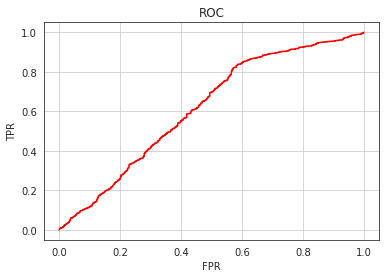

In [21]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [22]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [23]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [24]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

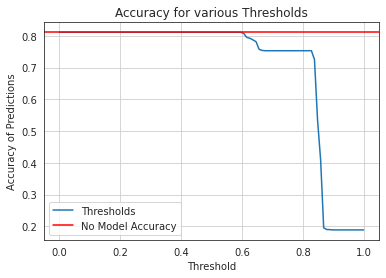

In [25]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [26]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7532355478861087

3.3 According to the graph more than 75% percent of the people will pay their loans.However, it is not common result in general. On the purpose of improving the model, it can be added more variabless to elaborate the model